# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

### Импорт библиотек

In [203]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_iris
%matplotlib inline

### Загрузка данных

In [204]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target

## 2) Основные характеристики датасета

In [205]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [206]:
# Размер датасета - 150 строк, 5 колонок
data.shape

(150, 5)

In [207]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [208]:
# Список колонок
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [209]:
# Список колонок с типами данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object

In [210]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
class - 0


In [211]:
# Основные статистические характеристки набора данных
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [212]:
# Определим уникальные значения для целевого признака
data['class'].unique()

array([0, 1, 2])

## 3) Визуальное исследование датасета

### Диаграмма рассеяния

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

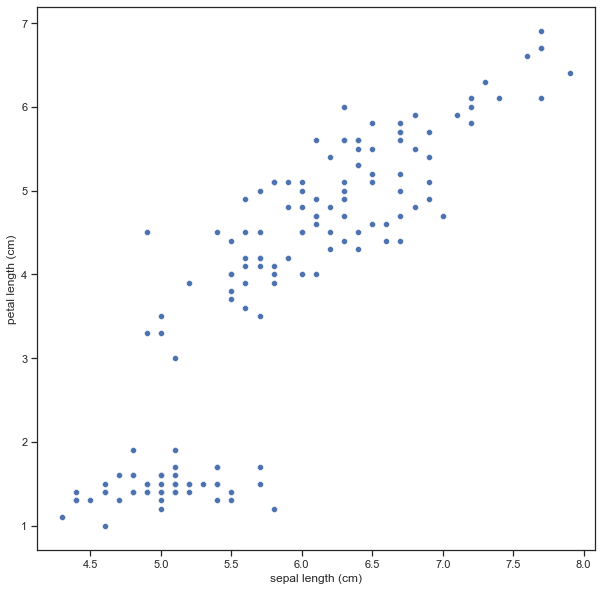

In [213]:
# Диаграмма зависимости длины внутренней доли околоцветника от длины наружной доли
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

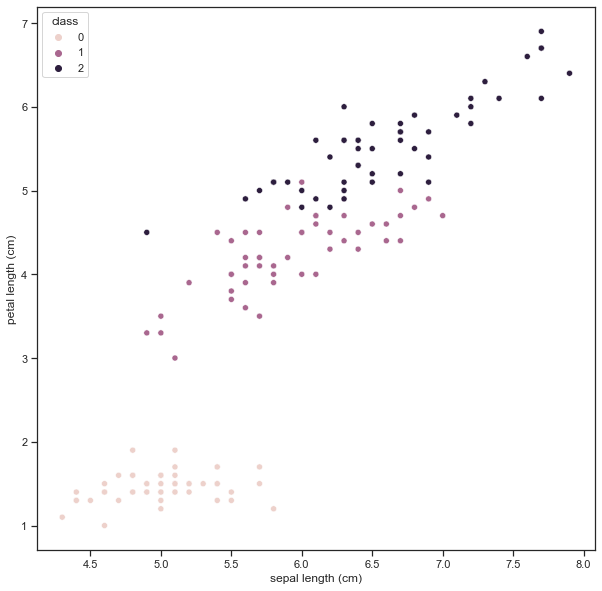

In [214]:
# Диаграмма с целевым признаком
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data, hue='class')

### Гистограмма

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

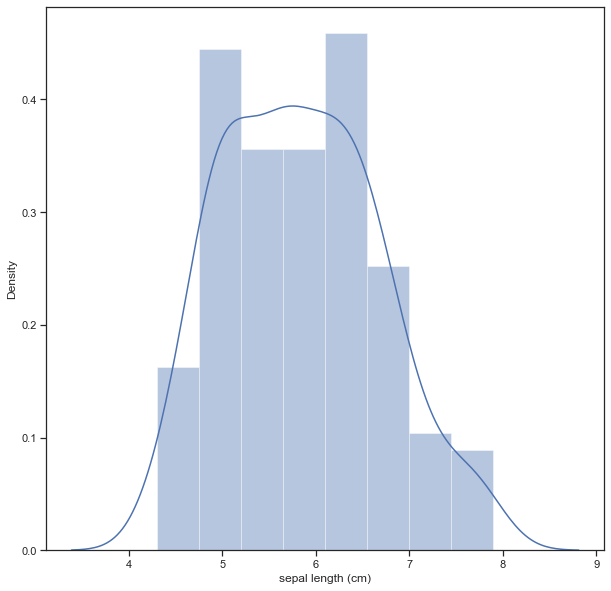

In [215]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal length (cm)'])

### Jointplot

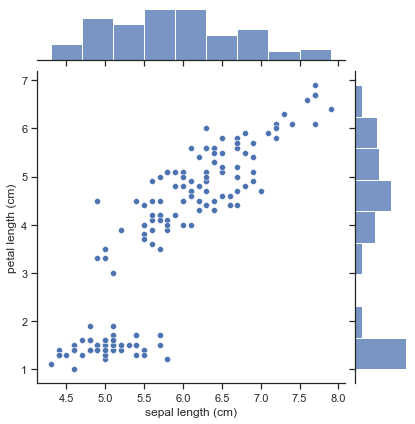

In [216]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data)

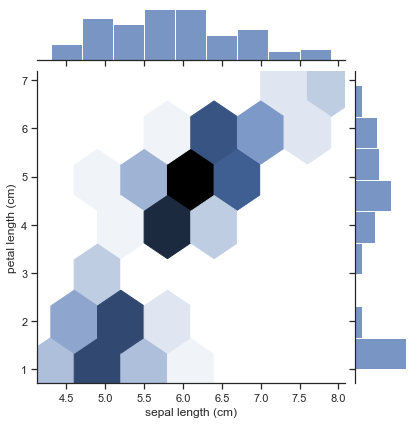

In [217]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data, kind="hex")

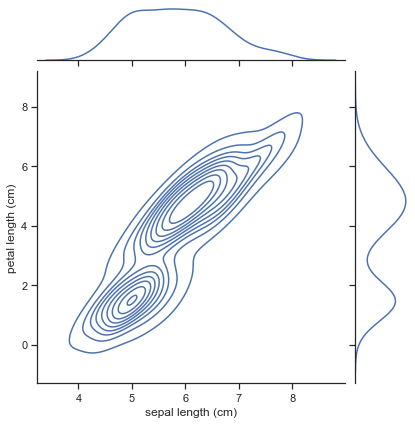

In [218]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data, kind="kde")

### "Парные диаграммы"

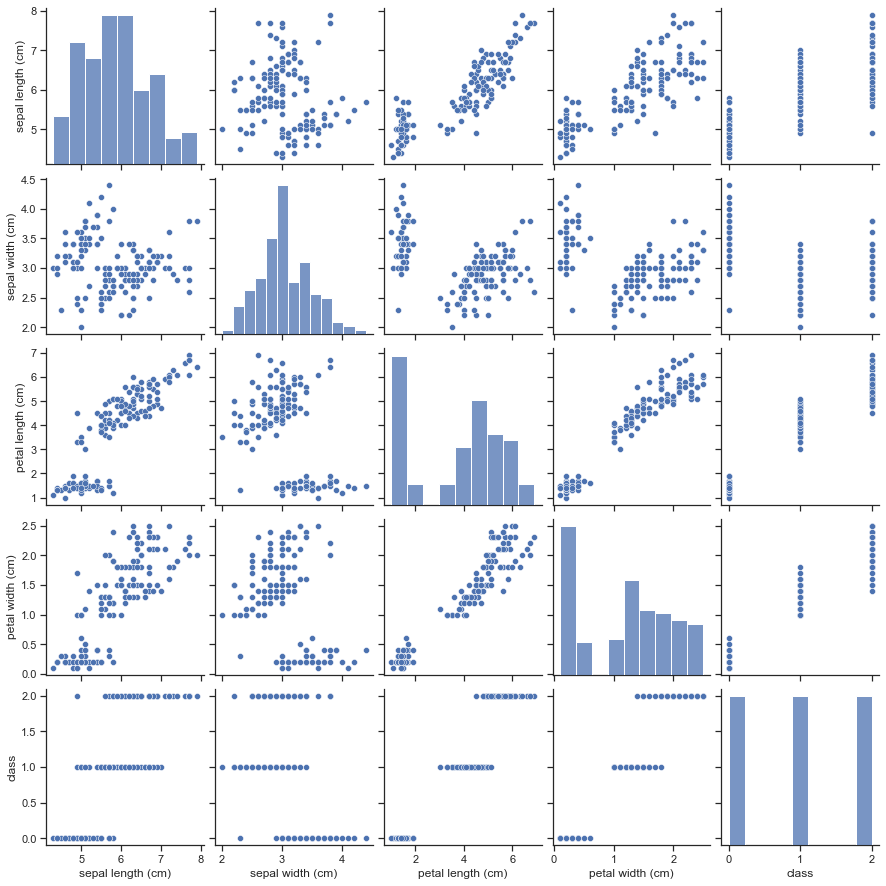

In [219]:
sns.pairplot(data)

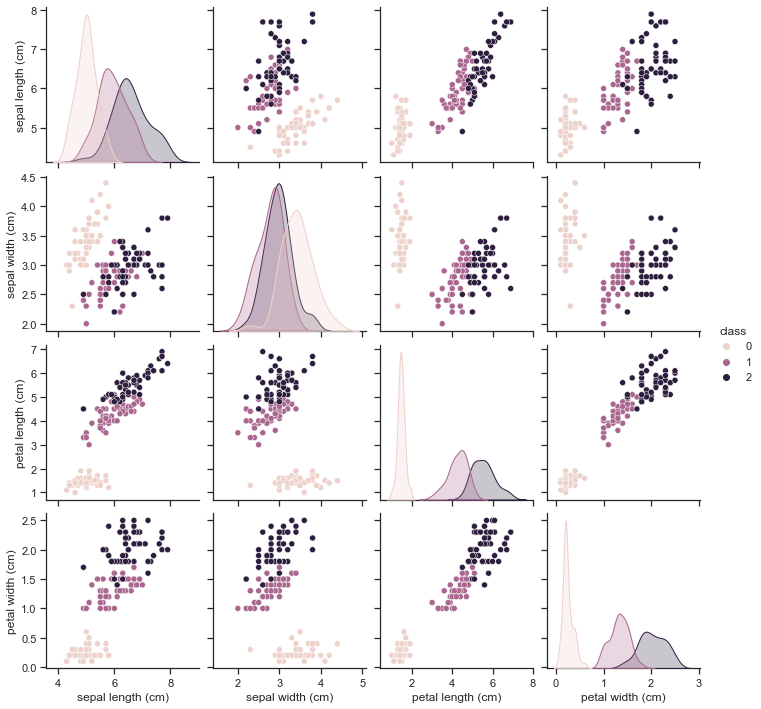

In [220]:
sns.pairplot(data, hue="class")

### Ящик с усами

<AxesSubplot:xlabel='sepal length (cm)'>

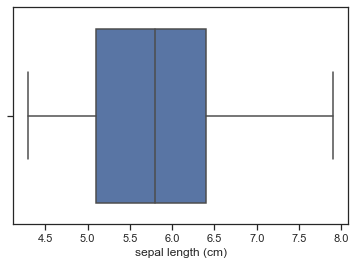

In [221]:
# По горизонтали
sns.boxplot(x=data['sepal length (cm)'])

<AxesSubplot:ylabel='sepal length (cm)'>

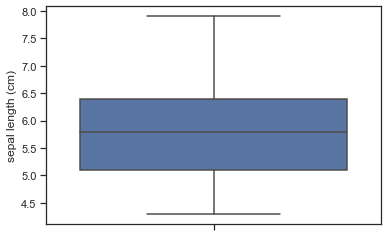

In [222]:
# По вертикали
sns.boxplot(y=data['sepal length (cm)'])

<AxesSubplot:xlabel='class', ylabel='sepal length (cm)'>

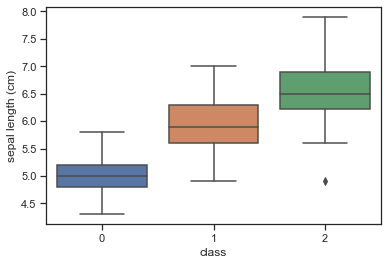

In [223]:
# Распределение параметра sepal length (cm) сгруппированные по class.
sns.boxplot(x='class', y='sepal length (cm)', data=data)

### Violin plot

<AxesSubplot:xlabel='sepal length (cm)'>

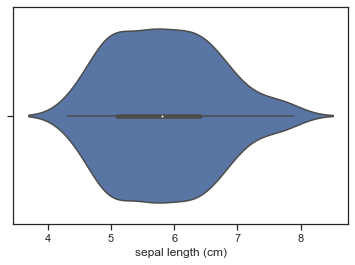

In [224]:
sns.violinplot(x=data['sepal length (cm)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

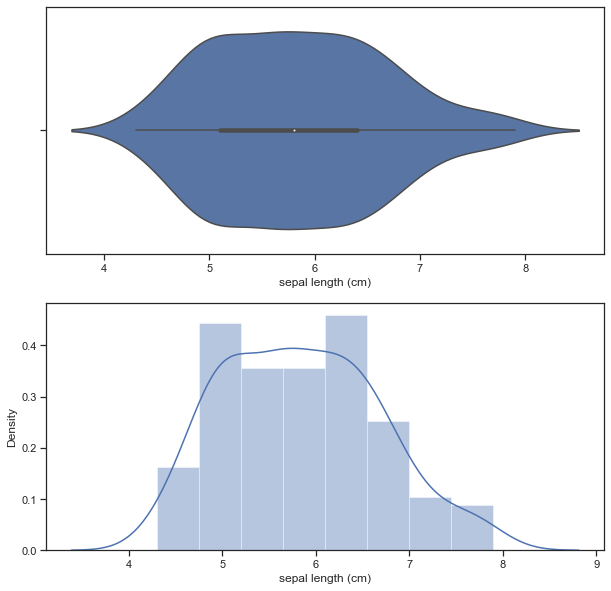

In [225]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['sepal length (cm)'])
sns.distplot(data['sepal length (cm)'], ax=ax[1])

<AxesSubplot:xlabel='class', ylabel='sepal length (cm)'>

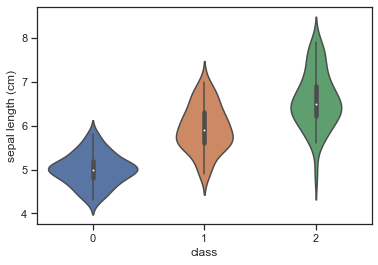

In [226]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='class', y='sepal length (cm)', data=data)

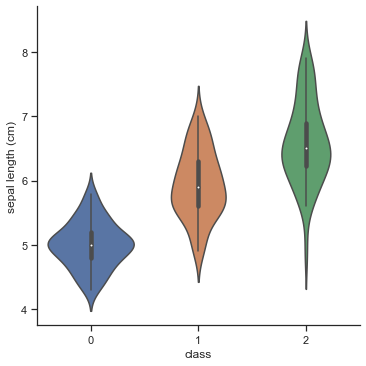

In [227]:
sns.catplot(y='sepal length (cm)', x='class', data=data, kind="violin", split=True)

## 4) Информация о корреляции признаков

In [228]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [229]:
data.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [230]:
data.corr(method='kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.076997,0.718516,0.655309,0.670444
sepal width (cm),-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal length (cm),0.718516,-0.185994,1.000000,0.806891,0.822911
petal width (cm),0.655309,-0.157126,0.806891,1.000000,0.839687
class,0.670444,-0.337614,0.822911,0.839687,1.000000


In [231]:
data.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
class,0.798078,-0.440290,0.935431,0.938179,1.000000


### Тепловая карта

<AxesSubplot:>

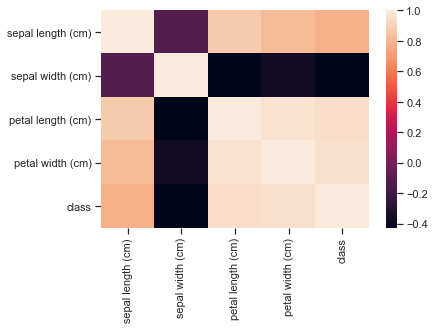

In [232]:
sns.heatmap(data.corr())

<AxesSubplot:>

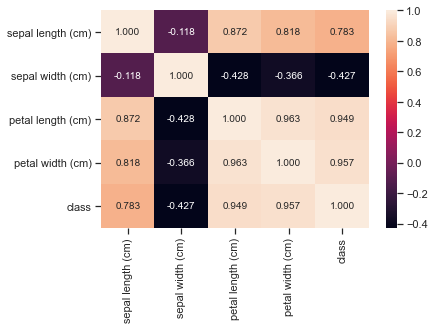

In [233]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

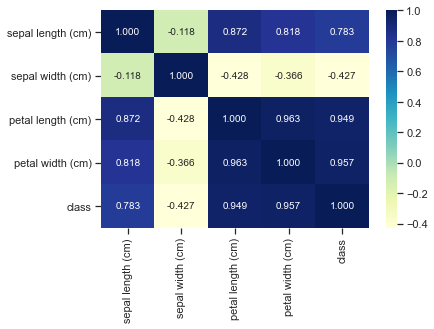

In [234]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

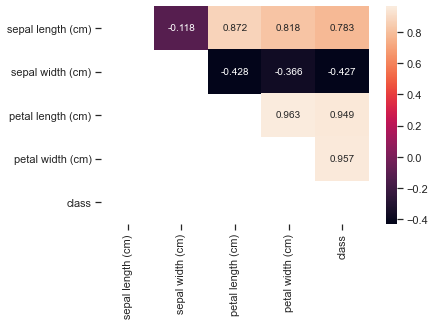

In [235]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

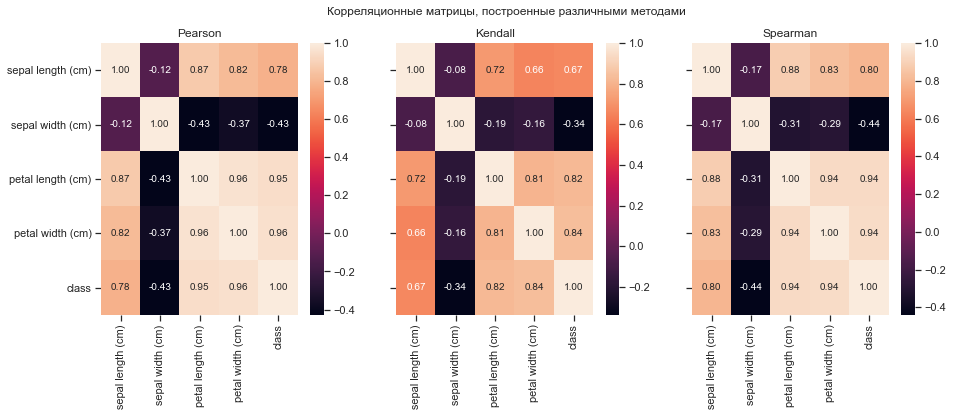

In [236]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')